<h1 style="text-align: center;">Introduction to Modern Mathematical Modeling with R:</h1>
<h2 style="text-align: center;">A User's Manual to Train Mathematical Consultants<br></h2>

<h3 style="text-align: center;">A Cambridge University Press book</h3>
<h3 style="text-align: center;">by SSP Shen<br><br></h3>

<p style="text-align: center;">Compiled and Edited by Joaquin Stawsky</p>
<p style="text-align: center;">Momtaza Sayd Contributed to this Version of the Code</p>
<p style="text-align: center;">San Diego State University, August 2024</p>

## Chapter 10: Statistical Models and Hypothesis Tests
### Statistical Indices from the Global Temperature From 1880 to 2015

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from scipy.stats import kurtosis, skew, norm, t
import os
import netCDF4 as nc

In [2]:
os.chdir('/Users/momtaza/Desktop/RMathModel/data')
nc = nc.Dataset("air.mon.mean.nc")
dat1 = pd.read_csv("aravg.ann.land_ocean.90S.90N.v4.0.0.2015.txt",
                   header=None, sep="\s+", index_col=0)
dat1

1         2         3         4         5
0                                                     
1880 -0.367918  0.009748  0.001406  0.000850  0.007492
1881 -0.317154  0.009781  0.001406  0.000877  0.007498
1882 -0.317069  0.009771  0.001406  0.000897  0.007468
1883 -0.393357  0.009758  0.001406  0.000910  0.007443
1884 -0.457649  0.009724  0.001406  0.000922  0.007395
...        ...       ...       ...       ...       ...
2011  0.325297  0.005740  0.000025  0.000002  0.005713
2012  0.370861  0.005755  0.000025  0.000002  0.005728
2013  0.416356  0.005743  0.000025  0.000002  0.005715
2014  0.491245  0.005743  0.000025  0.000002  0.005715
2015  0.650217  0.005743  0.000025  0.000002  0.005715

[136 rows x 5 columns]

In [3]:
tmean15 = np.array(dat1.iloc[:, 0])

print(f"Head of tmean15: {tmean15[:6]}")
print(f"Mean of tmean15: {np.mean(tmean15)}")
print(f"Standard Deviation of tmean15: {np.std(tmean15)}")
print(f"Variance of tmean15: {np.var(tmean15)}")
print(f"Skewness of tmean15: {skew(tmean15)}")
print(f"Kurtosis of tmean15: {kurtosis(tmean15)}")
print(f"Median of tmean15: {np.median(tmean15)}")
print(f"Quantiles of tmean15: {np.quantile(tmean15, [.05, .25, .5, .75, .95])}")

Head of tmean15: [-0.367918 -0.317154 -0.317069 -0.393357 -0.457649 -0.468707]
Mean of tmean15: -0.20343672794117645
Standard Deviation of tmean15: 0.3027374966777777
Variance of tmean15: 0.09164999189472746
Skewness of tmean15: 0.7220978033711742
Kurtosis of tmean15: -0.332125014268315
Median of tmean15: -0.29694
Quantiles of tmean15: [-0.57924725 -0.422854   -0.29694    -0.0159035   0.3743795 ]


In [4]:
yrtime = np.arange(1880, 2016)
regTrend = np.polyfit(yrtime, tmean15[:tmean15.shape[0]], 1)
trend = lambda t: regTrend[0]*t + regTrend[1]

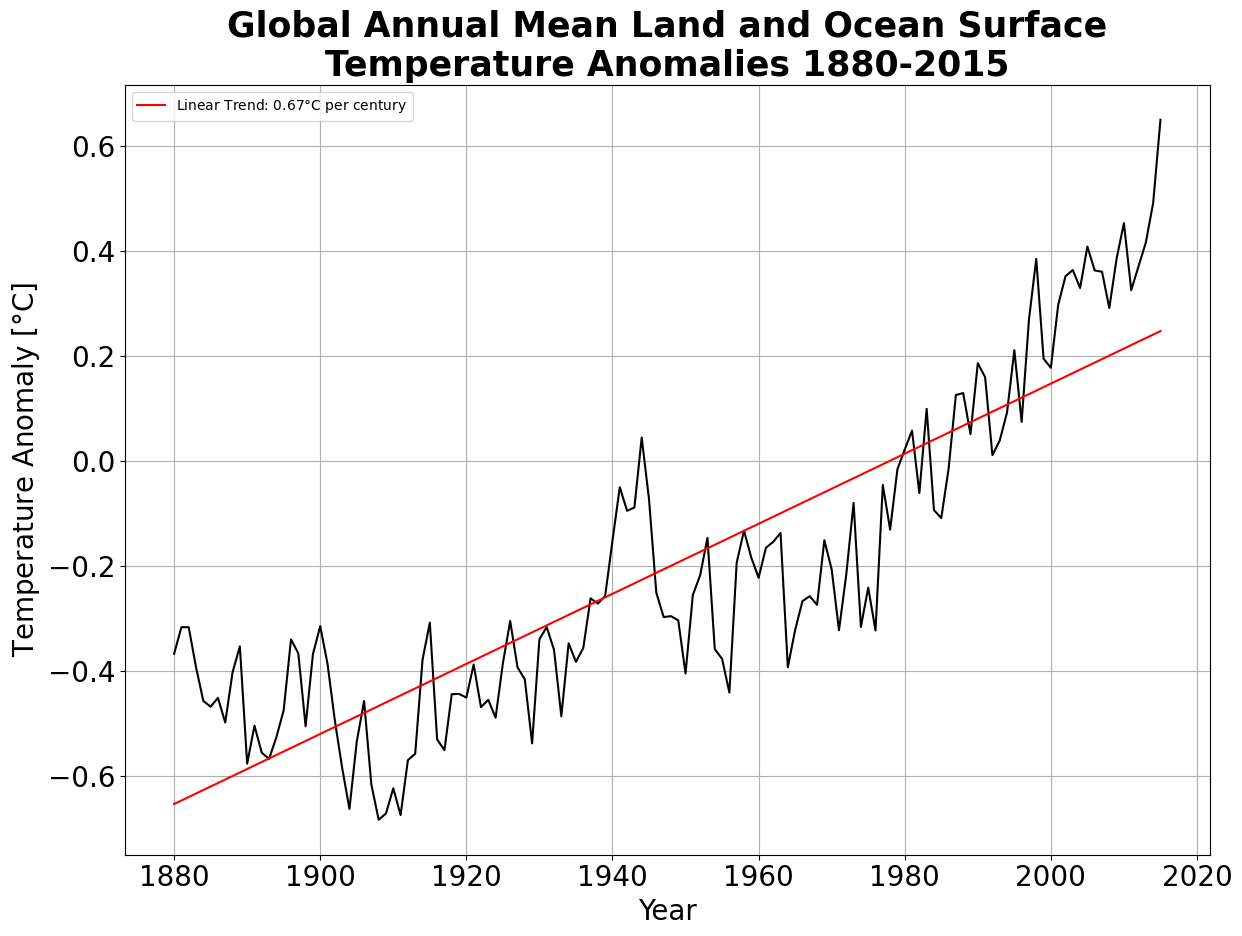

In [12]:
#Figure 10.1
fig, ax = plt.subplots(1, figsize=(14, 10))

ax.plot(yrtime, tmean15[:tmean15.shape[0]], '-k')
ax.plot(yrtime, trend(yrtime), '-r', label=f"Linear Trend: "
                                           f"{100*regTrend[0]:3.2f}$\degree$C"
                                           f" per century")
ax.legend(loc='upper left')
ax.set_ylabel("Temperature Anomaly [$\degree$C]",size=20)
ax.set_xlabel("Year",size=20)
ax.tick_params(labelsize=20)
ax.set_title("Global Annual Mean Land and Ocean Surface\n"
             "Temperature Anomalies 1880-2015"
            ,fontweight="bold", size=25)
ax.grid()

#fig.savefig("GlobalAnnualMeanLandandOceanSurface.jpg", bbox_inches='tight')

### Histogram of a Set of Data

Text(0.5, 1.0, 'Histogram of 1880-2015 \nTemperature Anomalies')

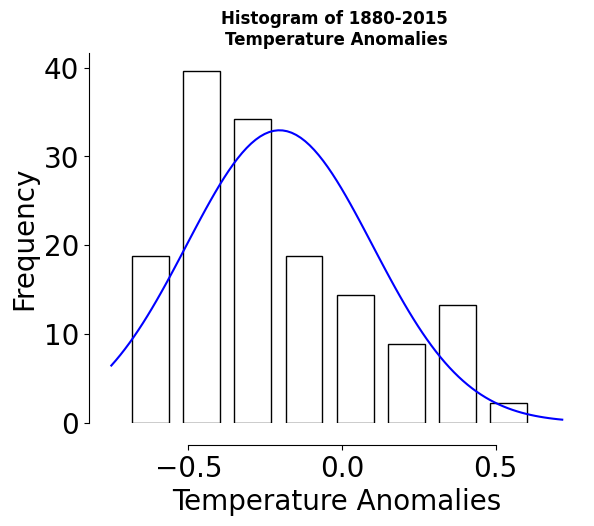

In [10]:
#Figure 10.2
fig, ax = plt.subplots(1)

h = ax.hist(tmean15, bins=8, fc='w', ec='k', width=.12, align='mid', density=True)
mu, std = norm.fit(tmean15)
xmin, xmax = ax.get_xlim()
x = np.linspace(xmin, xmax, 101)
ax.plot(x, norm.pdf(x, mu, std), '-b')

ax.set_ylabel("Frequency",size=20)
ax.set_yticks([.4*i for i in range(5)])
ax.set_yticklabels([10*i for i in range(5)])

ax.set_xlabel("Temperature Anomalies",size=20)
ax.set_xticks([-.5, 0, .5])

ax.tick_params(labelsize=20)
ax.spines['bottom'].set_bounds(-.5,.5)
ax.spines['bottom'].set_position(('data',-.1))

ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)

ax.set_title("Histogram of 1880-2015 \nTemperature Anomalies"
             ,fontweight="bold")

#fig.savefig("AnomaliesHistogram.jpg", bbox_inches='tight')

### Box Plot

Text(0.5, 1.0, 'Boxplot of 1880-2015\nTemperature Anomalies')

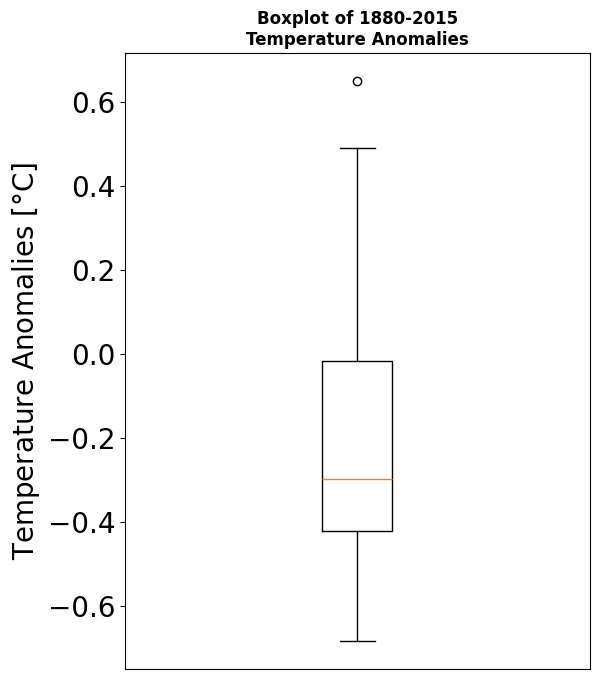

In [16]:
#Figure 10.3
fig, ax = plt.subplots(figsize=(6,8))

ax.boxplot(tmean15)
ax.set_ylabel("Temperature Anomalies [$\degree$C]",size=20)
ax.tick_params(labelsize=20)
ax.set_xticks([])
ax.set_title("Boxplot of 1880-2015\nTemperature Anomalies"
            ,fontweight="bold")

#fig.savefig("AnomaliesBoxplot.jpg", bbox_inches='tight')

### Scatter Plot

In [17]:
ust = pd.read_csv("USJantemp1951-2016-nohead.csv", header=None)
soi = pd.read_csv("soi-data-nohead.csv", header=None)

In [18]:
soid = np.array(soi.iloc[:,1])
soij = soid[12*np.arange(66)]

ustj = np.array(ust.iloc[:,2])

dataTrend = np.polyfit(soij, ustj, 0)[0]

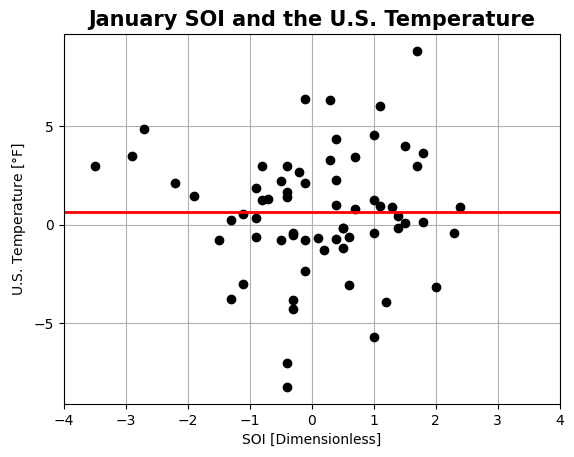

In [30]:
#Figure 10.4
fig, ax = plt.subplots(1)

ax.plot(soij, ustj, 'ok')
ax.axhline(dataTrend, lw=2, color='r')

ax.set_ylabel("U.S. Temperature [$\degree$F]",size=10)
ax.set_yticks([-5, 0, 5])

ax.set_xlim(-4, 4)
ax.set_xlabel("SOI [Dimensionless]",size=10)

ax.tick_params(labelsize=10)
ax.set_title("January SOI and the U.S. Temperature",fontweight="bold",size=15)
ax.grid()

#fig.savefig("CH10;JanSOIandTemp.jpg", bbox_inches='tight')

### QQ-Plot

In [25]:
tstand = (tmean15 - np.mean(tmean15))/np.std(tmean15)

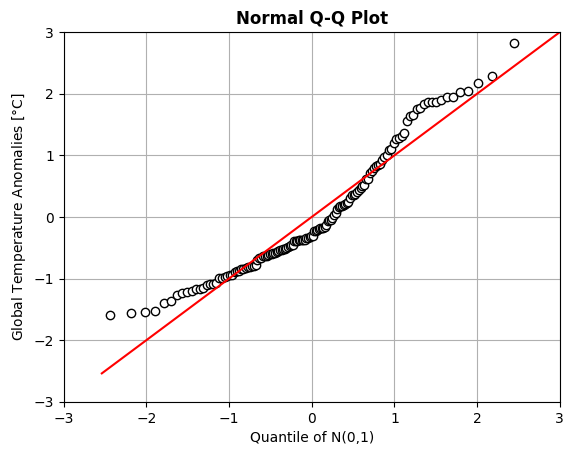

In [29]:
#Figure 10.5
fig, ax = plt.subplots()
fig = sm.qqplot(tstand, line='45', ax=ax, marker = 'o', markerfacecolor = 'white', markeredgecolor = 'k')
ax.set_ylabel("Global Temperature Anomalies [$\degree$C]",size=10)
ax.set_xlabel("Quantile of N(0,1)",size=10)
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
ax.tick_params(labelsize=10)
ax.set_title("Normal Q-Q Plot",fontweight="bold")
ax.grid()

#fig.savefig("QQPlotofTempAnomalies.jpg", bbox_inches='tight')

### What is a Probability Distribution?

In [31]:
labels = ['Las Vegas', 'San Diego', 'Seattle']
clear = [0.58,0.40,0.16]
cloudy = [0.42,0.6,0.84]
width = 1

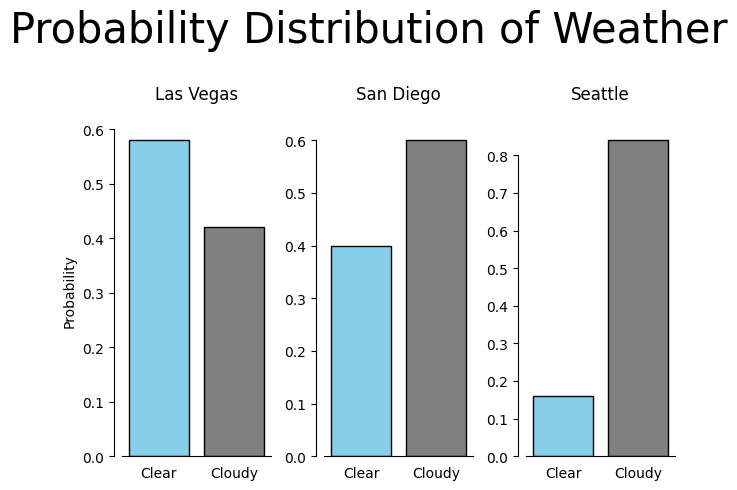

In [33]:
#Figure 10.6
fig, ax = plt.subplots(1,3)

for (axes, sunny, clouds, place) in zip(ax, clear, cloudy, labels):
    axes.bar(-width/2, sunny, fc='skyblue', ec='k')
    axes.bar(width/2, clouds, fc='gray', ec='k')
    axes.set_xticks([-width/2, width/2])
    axes.set_xticklabels(['Clear', 'Cloudy'])
    axes.set_title(place, y=1.05)
    axes.spines['right'].set_linewidth(0)
    axes.spines['top'].set_linewidth(0)
    axes.spines['left'].set_position(('data',-1.1))
    lims = axes.get_yticks()
    axes.spines['left'].set_bounds(lims[0], lims[-2])
    axes.tick_params(axis='x', width=0)


ax[0].set_ylabel("Probability")

fig.suptitle("Probability Distribution of Weather", size=30, y=1.01)
fig.tight_layout(pad=1)

#fig.savefig("ProbabilityWeatherPlots.jpg", bbox_inches='tight')

### Normal Distribution

In [34]:
x = np.linspace(-3.5, 3.5, 1001)
pdf = norm.pdf(x, 0, 1)
here = [True if (i < -1.5 or i > -1.2) else False for i in x]
l = np.mean([-1.5, -1.2])
mid = np.where(np.abs(x - l) < .001)[0]
point = (x[mid], pdf[mid]/2)

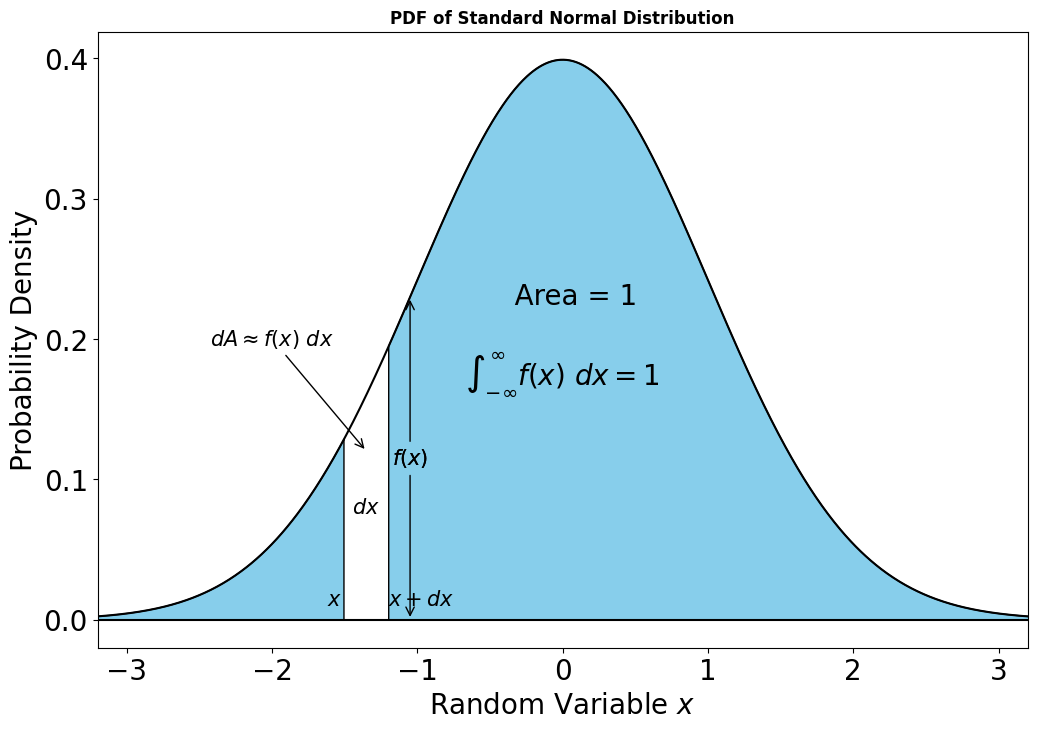

In [35]:
#Figure 10.7
fig, ax = plt.subplots(1, figsize=(12,8))

ax.plot(x, pdf, '-k')
ax.axhline(y=0, color='k')
ax.fill_between(x, pdf, where=here, fc='skyblue', ec='k')
ax.set_xlim(-3.2, 3.2)
ax.set_ylabel("Probability Density",size=20)
ax.set_yticks([0.1*i for i in range(5)])
ax.set_xlabel("Random Variable $x$",size=20)
ax.tick_params(labelsize=20)
ax.set_title("PDF of Standard Normal Distribution",fontweight="bold")

ax.text(0, pdf.max()/2, "   Area = 1\n\n$\int_{-\infty}^\infty f(x)\ dx = 1$",
        fontsize=20, horizontalalignment="center", verticalalignment="center")
ax.text(*point, "$dx$", fontsize=15,
        horizontalalignment='center', verticalalignment="center")
ax.text(-1.62, .01, "$x$", fontsize=15)
ax.text(-1.2, .01, "$x+dx$", fontsize=15)
ax.annotate(r"$dA \approx f(x)\ dx$", xy=(point[0],point[1]*1.5), xytext=(-2,.2), fontsize=15,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})
ax.annotate("$f(x)$", xy=(x[350], 0), fontsize=15, xytext=(x[350], pdf[350]/2),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})
ax.annotate("$f(x)$", xy=(x[350], pdf[350]), fontsize=15, xytext=(x[350], pdf[350]/2),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

fig.savefig("CH10;PDFofSND.jpg", bbox_inches='tight');

In [36]:
fmts = ['-r', '-b', '-k', '-m', '-g']
mus = [0, 0, 0, 3, -4]
stds = [1, 2, .5, 1, 1]
x = np.linspace(-7, 7, 1001)

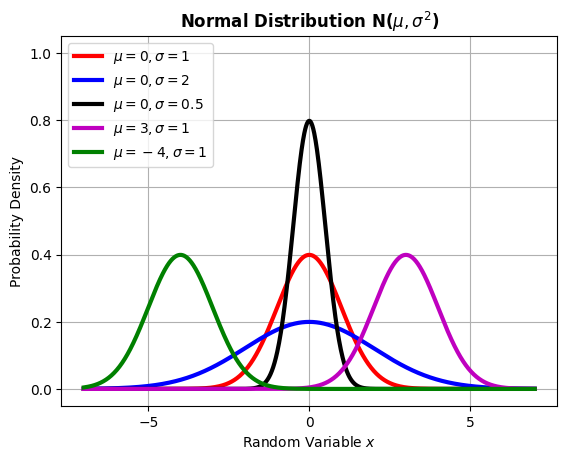

In [39]:
#Figure 10.8
fig, ax = plt.subplots()

for (fmt, mu, std) in zip(fmts, mus, stds):
    ax.plot(x, norm.pdf(x, mu, std), fmt, lw=3, label=f"$\mu = {mu}, \sigma = {std}$")

ax.legend(loc='upper left')
ax.set_ylabel("Probability Density",size=10)
ax.set_xlabel("Random Variable $x$",size=10)
ax.tick_params(labelsize=10)
ax.set_ylim(-.05, 1.05)
ax.set_xticks([-5, 0, 5])
ax.set_title("Normal Distribution N($\mu, \sigma^2$)",fontweight="bold")
ax.grid()

#fig.savefig("NormalDistsPDFs.jpg", bbox_inches='tight');

### Student’s t-Distribution

In [40]:
dfs = [3, 1, 2, 6, 10_000]
x = np.linspace(-4, 4, 101)

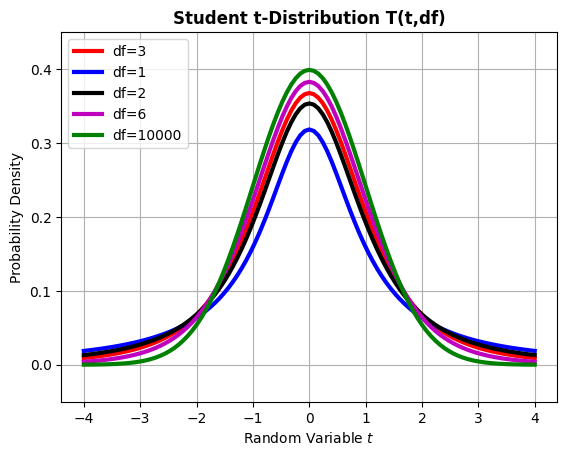

In [41]:
#Figure 10.9
fig, ax = plt.subplots()

for (df, fmt) in zip(dfs, fmts):
    ax.plot(x, t.pdf(x, df), fmt, lw=3, label=f"df={df}")
ax.legend(loc='upper left')
ax.set_ylim(-.05, .45)
ax.set_ylabel("Probability Density",size=10)
ax.set_xlabel("Random Variable $t$",size=10)
ax.tick_params(labelsize=10)
ax.set_title("Student t-Distribution T(t,df)",fontweight="bold")
ax.grid()

fig.savefig("CH10;StudentTPDFs.jpg", bbox_inches='tight');

### Probability of a Sample Inside a Confidence Interval

In [42]:
mu = 14 # True Mean
sig = 0.3 # True SD
n = 50 # Sample size
d = 1.96*sig/np.sqrt(n)

lowerlim, upperlim = mu-d, mu+d

ksim = 10_000 # Number of simulations

In [43]:
sims = np.random.normal(loc=mu, scale=sig, size=(n, ksim))
xbars = np.mean(sims, axis=0)

k = len(np.where((lowerlim <= xbars) & (xbars <= upperlim))[0])

print(f"{k} out of our {ksim} generated means are within the range "
      f"({lowerlim:4.2f},{upperlim:4.2f}).")

9500 out of our 10000 generated means are within the range (13.92,14.08).


(13.92, 14.08)


Text(14, 550, '95% Confidence Interval: (13.92, 14.08)')

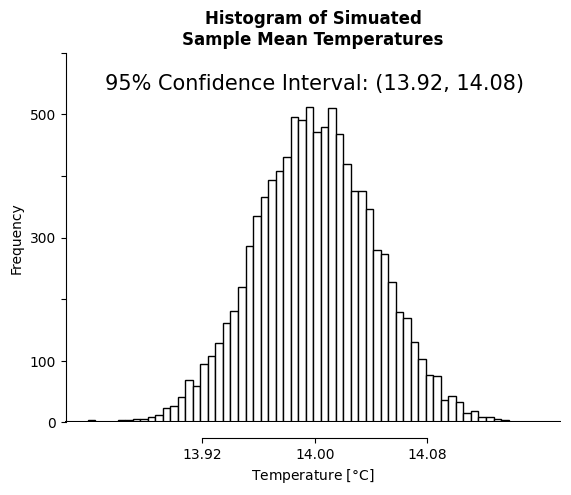

In [46]:
#Figure 10.10
fig, ax = plt.subplots(1,1)

ax.hist(xbars, bins=60, ec='black', fc='white')
ax.axhline(y=0, color='black')

ax.set_ylabel("Frequency",size=10)
ax.set_yticks([100*i for i in range(7)])
ax.set_yticklabels([100*i if i % 2 == 1 or i == 0 else None for i in range(7)])
ax.spines['left'].set_position(('data', 13.823))

ax.set_xlabel("Temperature [$\degree$C]",size=10)
ax.set_xticks([13.92, 14.00, 14.08])
ax.spines['bottom'].set_position(('data',-25))
ax.spines['bottom'].set_bounds(np.round(lowerlim, 2), np.round(upperlim, 2))
print(ax.spines['bottom'].get_bounds())

ax.tick_params(labelsize=10)
ax.set_title("Histogram of Simuated\n"
             "Sample Mean Temperatures",fontweight="bold")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(mu, 550, f"95% Confidence Interval: (13.92, 14.08)", size=15,
            horizontalalignment="center", verticalalignment="center")

#fig.savefig("HistogramofSimulateSampleMeans.jpg", bbox_inches='tight');

### Confidence Interval of the Sample Mean

In [47]:
x = np.linspace(-3, 3, 1000)
curve = norm.pdf(x, 0, 1)

blues = [False if -1 < i < 1 else True for i in x]
reds = [False if -2 < i < 2 else True for i in x]

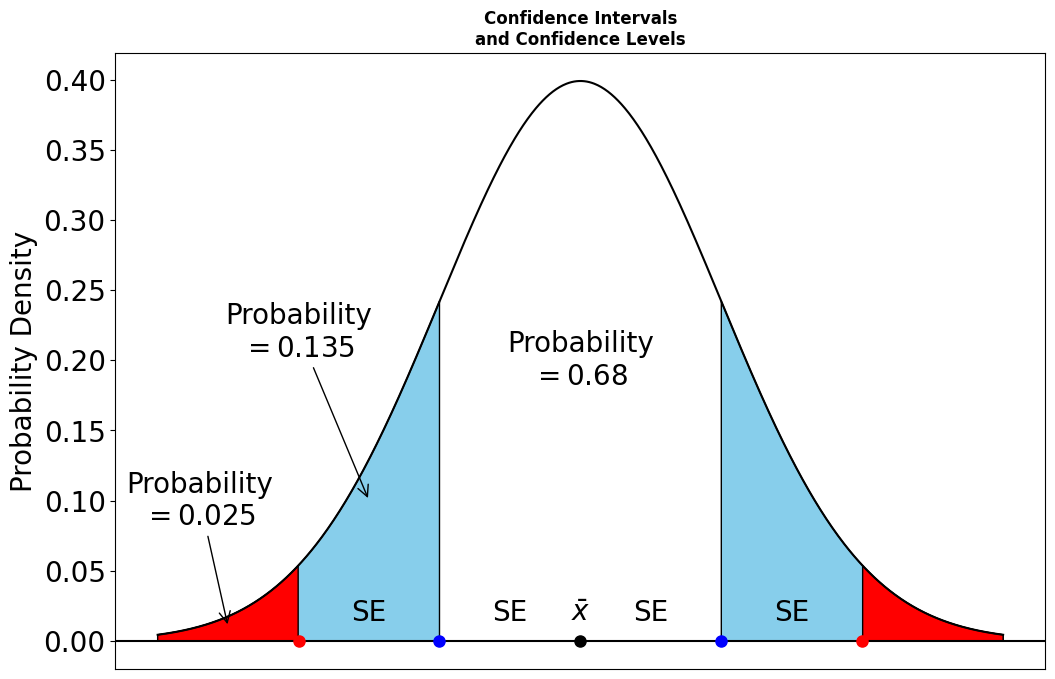

In [49]:
#Figure 10.11
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

ax.plot(x, curve, '-k')
ax.axhline(y=0, xmin=-3, xmax=3, color='black')
for (fmt, sd) in zip(['or', 'ob', 'ok', 'ob', 'or'], [i for i in range(-2, 3)]):
    ax.plot(sd, 0, fmt, ms=8)

for (here, col) in zip([blues, reds], ['skyblue', 'red']):
    ax.fill_between(x, np.zeros(x.size), curve, where=here, fc=col, ec='black')

ax.set_xticks([])

ax.set_title("Confidence Intervals\n"
             "and Confidence Levels",fontweight="bold")

ax.text(0, .2, "Probability\n$= 0.68$", size=20,
            horizontalalignment="center", verticalalignment="center")
ax.text(0, .02, r"$\bar{x}$",size=20,
            horizontalalignment="center", verticalalignment="center")
for loc in np.linspace(-1.5, 1.5, 4):
    ax.text(loc, .02, "SE", size=20,
                horizontalalignment="center", verticalalignment="center")

ax.annotate("Probability\n$= 0.135$", xy=(-1.5, 0.1), fontsize=20,
            xytext=(-2, .22),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

ax.annotate("Probability\n$= 0.025$", xy=(-2.5,.01), fontsize=20,
            xytext=(-2.7, 0.1),
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

ax.set_ylabel("Probability Density",size=20)
ax.tick_params(labelsize=20)

#fig.savefig("ConfidenceIntervalsandLevels.jpg", bbox_inches='tight');

### Statistical Inference for x-bar Using a Z-score

In [50]:
lime = [True if i >= -1.96 else False for i in x]
skyblue = [True if i < -2.5 else False for i in x]

Text(0.5, 1.0, 'Z-score, p-value, and Significance Level')

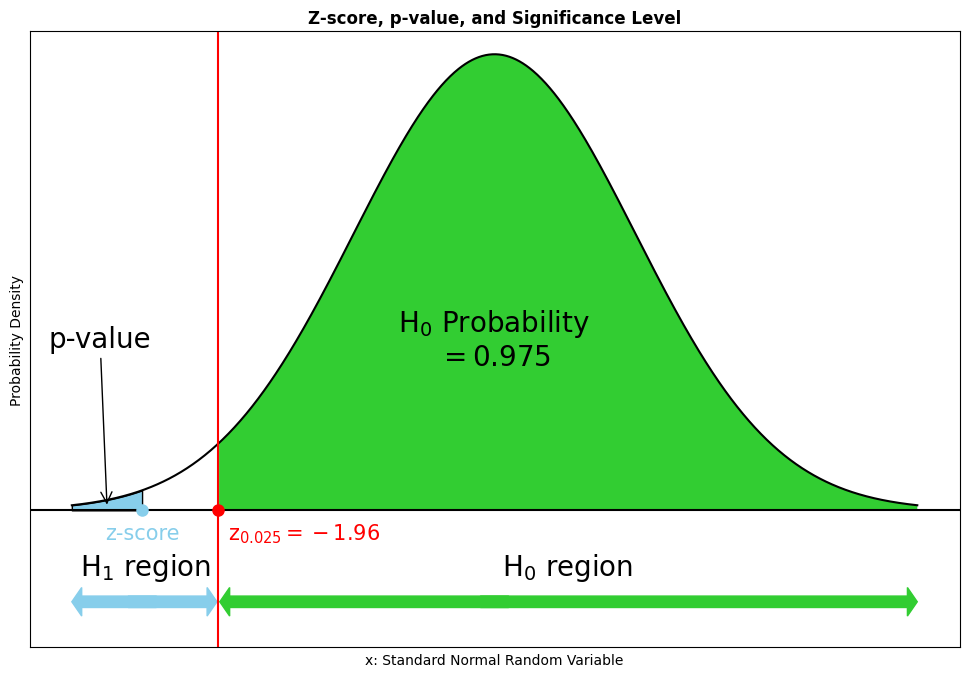

In [52]:
#Figure 10.12
fig, ax = plt.subplots(1, 1, figsize=(12,8))

ax.plot(x, curve, '-k')
ax.axhline(y=0, color='black')
ax.axvline(x=-1.96, color='red')
ax.fill_between(x, np.zeros(x.size), curve, where=lime, fc='limegreen')
ax.fill_between(x, np.zeros(x.size), curve, where=skyblue,
                fc='skyblue', ec='black')
ax.annotate("p-value", xy=(-2.75, .0025), xytext=(-2.8, .15), size=20,
            horizontalalignment="center", verticalalignment="center",
            arrowprops={'arrowstyle':'->'})

ax.plot(-1.96, 0, 'or', ms=8)
ax.text(-1.35, -.02, s="z$_{0.025} = -1.96$", size=15, color='red',
            horizontalalignment="center", verticalalignment="center")

ax.plot(-2.5, 0, marker='o', color='skyblue', ms=8)
ax.text(-2.5, -.02, s="z-score", size=15, color='skyblue',
            horizontalalignment="center", verticalalignment="center")

yl, yg = ax.get_ylim()
ax.set_ylim(yl-.1, yg)

ax.set_yticks([])
ax.set_ylabel("Probability Density")

ax.set_xticks([])
ax.set_xlabel("x: Standard Normal Random Variable")

ax.arrow(-2.6, -.08, -1.97+2.6, 0, color='skyblue', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)
ax.arrow(-2.4, -.08, -3+2.4, 0, color='skyblue', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)

ax.arrow(-.1, -.08, 3+.1, 0, color='limegreen', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)
ax.arrow(.1, -.08, -.1-1.95, 0, color='limegreen', head_length = 0.07,
         head_width = 0.025, width=.01, length_includes_head = True)

ax.text(np.mean([-1.96, 3]), -.05, s="H$_0$ region", size=20,
            horizontalalignment="center", verticalalignment="center")
ax.text(np.mean([-1.96, -3]), -.05, s="H$_1$ region", size=20,
            horizontalalignment="center", verticalalignment="center")

ax.text(0, 0.15, s="H$_0$ Probability\n$=0.975$", size=20,
            horizontalalignment="center", verticalalignment="center")

ax.set_title("Z-score, p-value, and Significance Level",fontweight="bold")

#fig.savefig("SignificancePlot.jpg", bbox_inches='tight');

### Statistical Inference of Linear Trend

In [53]:
tm0615 = np.array(dat1.loc['2006':'2015', 1])
tm8190 = np.array(dat1.loc['1981':'1990', 1])
tm9100 = np.array(dat1.loc['1991':'2000', 1])

In [54]:
tm0615

array([0.36296 , 0.360386, 0.29137 , 0.385638, 0.453061, 0.325297,
       0.370861, 0.416356, 0.491245, 0.650217])

In [55]:
meanEst = np.mean(tm0615)
sdEst = np.std(tm0615)
n = 10

t_score = meanEst/(sdEst/np.sqrt(n))
pVal = t.sf(t_score, df=n-1)
print(f"t-score: {t_score}, p-value: {pVal}")
print(f"critical t-score {t.ppf(1-.025, df=n-1)}")

t-score: 13.379656358103858, p-value: 1.5158536432188566e-07
critical t-score 2.2621571627409915


In [56]:
barT1 = np.mean(tm8190)
barT2 = np.mean(tm9100)

S1sd = np.std(tm8190)
S2sd = np.std(tm9100)

Spool = np.sqrt(((n-1)*S1sd**2 + (n-1)*S1sd**2)/(2*(n - 1)))
t_s = (barT2 - barT1)/(Spool*np.sqrt(2/n))

tlow = t.ppf(.025, df=2*(n-1))
tup = t.ppf(.975, df=2*(n-1))

print(f"t-score: {t_s}\n"
      f"tlow: {tlow}\n"
      f"tup: {tup}")

pval = t.sf(t_s, df=2*(n-1))
print(f"p-value: {pval}")

print(f"1981-1990 temp: {barT1}\n"
      f"1991-2000 temp: {barT2}\n"
      f"barT2 - barT1: {barT2 - barT1}")

t-score: 2.869909172872578
tlow: -2.10092204024096
tup: 2.10092204024096
p-value: 0.005092800940925254
1981-1990 temp: 0.0368621
1991-2000 temp: 0.1612545
barT2 - barT1: 0.12439239999999999


In [57]:
tm = np.array(dat1.loc[:'2015', 1])
x = np.arange(1880, 2016)

tTrend = np.polyfit(x, tm, deg=1, full=True)
print(tTrend)

(array([ 6.67790773e-03, -1.32086620e+01]), array([3.1169559]), 2, array([1.41414175, 0.01425207]), 3.019806626980426e-14)
